Files already downloaded and verified


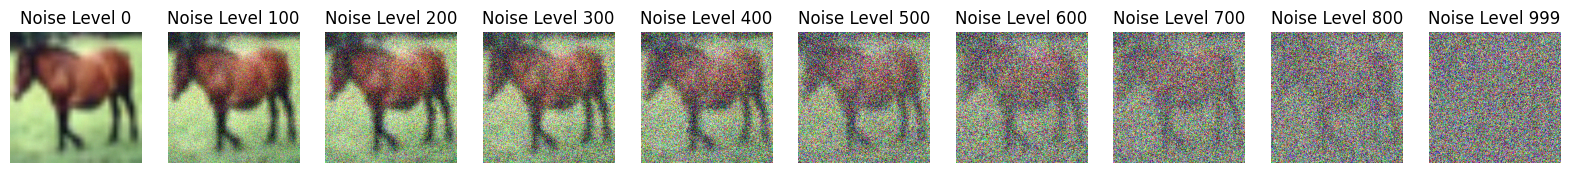

In [71]:
from Diffusion import Diffusion

from PIL import Image
import torch
import torchvision
import numpy as np
import math
from torch import nn
from torchvision import transforms
import matplotlib.pyplot as plt

transform = transforms.Compose([
            transforms.Resize(256), 
            transforms.ToTensor(),
            transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)) # normalize mean and std for n=3 color channels
        ])
training_set = torchvision.datasets.CIFAR10('./data', train=True, transform=transform, download=True)

ddpm = Diffusion()

# How many noise levels to generate
noise_levels = [0, 100, 200, 300, 400, 500, 600, 700, 800, 999]

img = training_set[7][0].to(device="cuda")

batch = img.repeat(len(noise_levels), 1, 1, 1)

ts = torch.tensor(noise_levels, dtype=torch.int, device="cuda")
noise_imgs = []
noise = torch.randn(batch.shape, device="cuda")

for i in range(len(ts)):
    noise_imgs.append(ddpm.add_noise(img, noise[i], ts[i]))

noise_imgs = torch.stack(noise_imgs, dim=0).to("cpu")
noise_imgs = (noise_imgs.clamp(-1, 1) + 1) / 2
noise_imgs = (noise_imgs * 255).type(torch.uint8)
noise_imgs = noise_imgs.permute(0, 2, 3, 1)
display_img = Image.fromarray(noise_imgs[8].numpy(), 'RGB')

fig, axs = plt.subplots(1, len(noise_levels), figsize=(20, 5))

for i, ax in enumerate(axs):
    ax.imshow(noise_imgs[i])
    ax.axis('off')
    ax.set_title(f'Noise Level {noise_levels[i]}')

plt.show()
